In [4]:
import pandas as pd
from gensim import utils
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from gensim.parsing.preprocessing import preprocess_string, remove_stopwords
import random

C:\Users\bhaveshb\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [5]:
pd.set_option('display.max_colwidth', -1)

In [6]:
movie_lines_file = 'movie_lines.txt'

In [7]:
with open(movie_lines_file) as f:
    movie_lines = [line.strip().split('+++$+++') for line in f.readlines()];

lines_df = pd.DataFrame([{'LineNumber': d[0].strip(), 
                                'Person': d[3].strip(),
                                'Line': d[4].strip(),
                                 'Movie' : d[2].strip()} 
                              for d in movie_lines])
lines_df = lines_df.set_index('LineNumber')

In [8]:
lines_df.head(10)

,Line,Movie,Person
LineNumber,,,
L1045,They do not!,m0,BIANCA
L1044,They do to!,m0,CAMERON
L985,I hope so.,m0,BIANCA
L984,She okay?,m0,CAMERON
L925,Let's go.,m0,BIANCA
L924,Wow,m0,CAMERON
L872,Okay -- you're gonna need to learn how to lie.,m0,BIANCA
L871,No,m0,CAMERON
L870,"I'm kidding. You know how sometimes you just become this ""persona""? And you don't know how to quit?",m0,BIANCA


In [9]:
len(lines_df)

304713

In [10]:
lines_df.nunique()

Line      265786
Movie     617   
Person    5356  
dtype: int64

In [11]:
lines_df_small = lines_df.head(50000)

In [12]:
class DocumentDataset(object):
    
    def __init__(self, data:pd.DataFrame, column):
        document = data[column].apply(self.preprocess)
        self.documents = [ TaggedDocument( text, [index]) 
                          for index, text in document.iteritems() ]
      
    def preprocess(self, document):
        return preprocess_string(remove_stopwords(document))
        
    def __iter__(self):
        for document in self.documents:
            yield documents
            
    def tagged_documents(self, shuffle=False):
        if shuffle:
            random.shuffle(self.documents)
        return self.documents

In [13]:
documents_dataset = DocumentDataset(lines_df_small, 'Line')

In [24]:
documents_dataset

In [14]:
docVecModel = Doc2Vec(min_count=1, window=5, vector_size=100, sample=1e-4, negative=5, workers=8)
docVecModel.build_vocab(documents_dataset.tagged_documents())

In [15]:
docVecModel.train(documents_dataset.tagged_documents(shuffle=True),
            total_examples = docVecModel.corpus_count,
           epochs=10)

In [27]:
docVecModel['L1045']

array([-1.3134415e-03,  1.6501151e-03, -5.2949326e-04,  4.6913894e-03,
       -3.7581732e-03,  1.9689591e-03,  2.5985637e-03,  4.5969295e-03,
       -1.9683766e-03,  3.2174124e-03, -2.7030762e-03, -2.4115648e-03,
       -1.7326063e-03,  1.1828188e-03, -2.9778765e-03,  4.9915700e-03,
       -2.3176942e-03, -7.1073900e-04,  4.5040981e-03, -1.1357837e-03,
        2.8304248e-03, -3.6912349e-03,  3.2851985e-04,  3.6433202e-03,
        1.5317241e-03, -2.0883083e-03, -3.7846749e-04, -3.9991443e-03,
        1.8028419e-03,  3.4214670e-04, -4.8576705e-03, -3.4072984e-03,
       -5.8809482e-04, -2.6674103e-04, -2.0832079e-03, -4.6553584e-03,
       -2.8547985e-03, -1.0647184e-03, -2.5603499e-03, -4.6091205e-03,
        2.7401142e-03, -2.9520888e-03,  3.7571273e-03,  2.7900895e-03,
       -3.6597040e-03,  3.9169877e-03, -3.1176100e-03,  4.1054108e-04,
        2.4673303e-03,  2.2831545e-03,  1.9477548e-03, -4.4350573e-03,
       -1.0267136e-03,  4.6706265e-03, -4.9775937e-03,  4.8374091e-03,
      

In [16]:
docVecModel['L872']

array([-0.00999255,  0.01121779,  0.01635954, -0.00920819,  0.01655221,
        0.01381668, -0.01893826,  0.01890673,  0.00602449,  0.01212227,
        0.00617704,  0.00530373,  0.00438731,  0.01207815, -0.00378634,
        0.01155938, -0.01598833, -0.01621517,  0.00925925, -0.0101096 ,
       -0.00958637, -0.00076498, -0.01306241,  0.01535184, -0.00766808,
       -0.00230881,  0.00130604,  0.00711551, -0.01465199,  0.01315565,
        0.00610187,  0.02287573, -0.02039285,  0.01049415,  0.01151987,
        0.00023039,  0.01469992, -0.00128502, -0.01226405, -0.00397229,
       -0.00264685,  0.01050834, -0.0272896 , -0.00634295,  0.02935975,
        0.01914983,  0.01771204,  0.02222202, -0.01039776, -0.00694761,
       -0.00353334, -0.01116739, -0.0027794 ,  0.00787708,  0.00295052,
       -0.01273573,  0.00055382,  0.00215054,  0.0036069 , -0.00755408,
       -0.00211701, -0.02106706, -0.00284395,  0.00359178,  0.00735721,
       -0.00457718, -0.01280562,  0.01133379,  0.00290893,  0.02

In [17]:
import matplotlib.pyplot as plt

In [22]:
def show_image(vector, line):
    fig, ax = plt.subplots(1,1, figsize=(10, 2))
    ax.tick_params(axis='both', 
                   which='both',
                   left=False, 
                   bottom=False,
                   top=False,
                   labelleft=False,
                   labelbottom=False)
    ax.grid(False)
    print(line)
    ax.bar(range(len(vector)), vector, 0.5)
   
  
def show_movie_line(line_number):
    line = lines_df_small.ix['L872'].Line
    doc_vector = docVecModel[line_number]
    show_image(doc_vector, line)

C:\Users\bhaveshb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


Okay -- you're gonna need to learn how to lie.


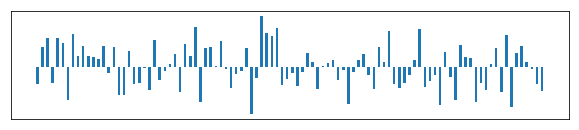

In [23]:
show_movie_line('L872')